#Tokenize

## NLTK

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = "Natural language processing with Python is fun. "
tokens = word_tokenize(text)
print(tokens)

['Natural', 'language', 'processing', 'with', 'Python', 'is', 'fun', '.']


In [ ]:
from nltk.tokenize import sent_tokenize
sentences = "Life is from the inside out. When you shift on the inside, life shifts on the outside. "
sent_tokens = sent_tokenize(sentences)
print(sent_tokens)

['Life is from the inside out.', 'When you shift on the inside, life shifts on the outside.']



## Spacy

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "Age is no guarantee of maturity."
doc = nlp(text)

spacy_tokens = [ token.text for token in doc ]
print(spacy_tokens)

['Age', 'is', 'no', 'guarantee', 'of', 'maturity', '.']


In [ ]:
text = "Life is from the inside out. When you shitf on the inside, life shitfs on the outside. "
doc = nlp(text)
spacy_sent_tokens = [ sent.text for sent in doc.sents ]
print(spacy_sent_tokens)

['Life is from the inside out.', 'When you shitf on the inside, life shitfs on the outside.']


___
# Stopword

In [18]:
import nltk
from nltk.tokenize import word_tokenize

text = "Natural language processing, or NLP, is fun! Isn'n it?"
origin_tokens = word_tokenize(text)
print(f"origin token count: {len(origin_tokens)}")

origin token count: 13


In [20]:
import re

cleaned_text = re.sub("[^\w\s]", "", text)
cleaned_tokens = word_tokenize(cleaned_text)
print(f"cleaned token count: {len(cleaned_tokens)}")

cleaned token count: 9


In [26]:
import pandas as pd
IMDB = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/IMDB_Top10000.csv', index_col = 0)
IMDB.head(3)

,label,review
0,1,I rented I AM CURIOUS-YELLOW from my video sto...
1,1,"""I Am Curious: Yellow"" is a risible and preten..."
2,1,If only to avoid making this type of film in t...


In [33]:
def preprocess_text(text: str):
    text = text.lower()
    text = re.sub("[^\w\s]", "", text)
    tokens = word_tokenize(text)
    return tokens

In [36]:
IMDB["tokenized"] = IMDB["review"].apply(preprocess_text)
IMDB.head(3)

,label,review,tokenized
0,1,I rented I AM CURIOUS-YELLOW from my video sto...,"[i, rented, i, am, curiousyellow, from, my, vi..."
1,1,"""I Am Curious: Yellow"" is a risible and preten...","[i, am, curious, yellow, is, a, risible, and, ..."
2,1,If only to avoid making this type of film in t...,"[if, only, to, avoid, making, this, type, of, ..."


In [50]:
from collections import Counter

tokenized_word_counts = Counter()
IMDB["tokenized"].apply(lambda x: tokenized_word_counts.update(x))
tokenized_word_counts.most_common(10)

[('the', 130573),
 ('a', 63489),
 ('and', 59053),
 ('of', 55300),
 ('to', 55008),
 ('is', 39989),
 ('in', 34856),
 ('this', 32484),
 ('i', 32012),
 ('it', 31100)]

  Token   Count  rank  cumSumCount
0   the  130573   1.0       130573
1     a   63489   2.0       194062
2   and   59053   3.0       253115


<Axes: >

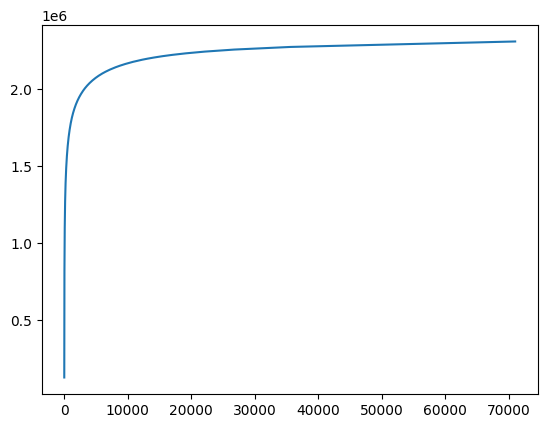

In [71]:
most_common_tokens = tokenized_word_counts.most_common()
df_most_common = pd.DataFrame(most_common_tokens, columns=["Token", "Count"])
df_most_common["rank"] = df_most_common["Count"].rank(ascending=False)
df_most_common["cumSumCount"] = df_most_common["Count"].cumsum()
print(df_most_common.head(3))
df_most_common["cumSumCount"].plot()

In [53]:
df_top100 = df_most_common.head(100)

In [54]:
import plotly.express as px
fig = px.treemap(df_top100, path=["Token"], values="Count")
fig.show()

In [64]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

text = "Natural language processing, or NLP, is fun! Isn't it?"
text = text.lower()
text = re.sub("[^\w\s]", "", text)
tokens = word_tokenize(text)
results = [ token for token in tokens if token not in stop_words ]
print(f"atfer remove token count : {len(results)}")

atfer remove token count : 6


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
def preprocess_stopword_text(text: str):
    text = text.lower()
    text = re.sub("[^\w\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [ token for token in tokens if token not in stop_words ]
    return tokens

import pandas as pd
from collections import Counter
import plotly.express as px

IMDB = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/IMDB_Top10000.csv', index_col = 0)
IMDB["tokenized"] = IMDB["review"].apply(preprocess_stopword_text)

counter = Counter()

IMDB["tokenized"].apply(lambda x: counter.update(x))


0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Name: tokenized, Length: 10000, dtype: object

   Token  Count  rank  cumSumCount
0     br  23949   1.0        23949
1  movie  18922   2.0        42871
2   film  14368   3.0        57239


<Axes: >

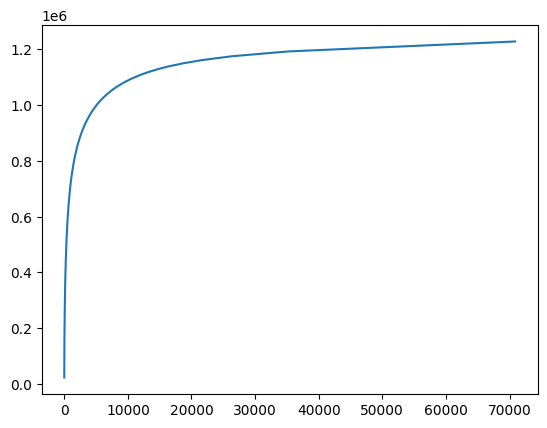

In [85]:
df_token_count = pd.DataFrame(counter.most_common(), columns=["Token", "Count"])
df_token_count["rank"] = df_token_count["Count"].rank(ascending=False)
df_token_count["cumSumCount"] = df_token_count["Count"].cumsum()
print(df_token_count.head(3))
df_token_count["cumSumCount"].plot()

In [82]:
import plotly.express as px

fig = px.treemap(df_token_count.most_common(100), path=["Token"], values="Count")
fig.show()

---
# 어간 추출(stemming)


In [77]:
import nltk
nltk.download("wordnet")
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = "jumping"
result = stemmer.stem(words)
result

[nltk_data] Downloading package wordnet to /root/nltk_data...


'jump'

---
# practice

In [86]:
import pandas as pd
email = pd.read_csv('https://raw.githubusercontent.com/jin0choi1216/dataset/main/NLP/ENG/SPAM%20text%20message%2020170820%20-%20Data.csv')
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## preprocessing

In [100]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def preprocess(text: str) -> list[str]:
    text = text.lower()
    text = re.sub("[^\w\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [ token for token in tokens if token not in stop_words and not token.isnumeric() ]
    return tokens

In [101]:
email["tokenized"] = email["Message"].apply(preprocess)
email.head(3)

,Category,Message,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."


<Axes: >

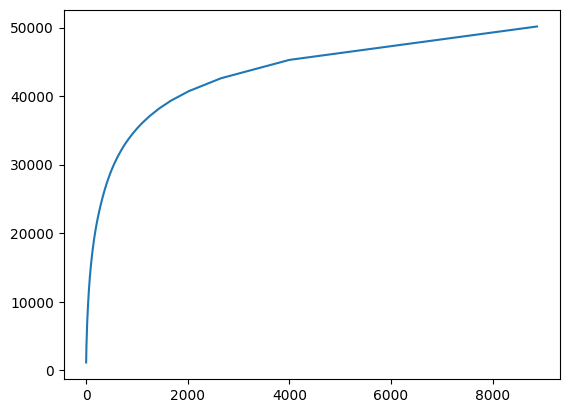

In [104]:
from collections import Counter
import pandas as pd

word_counter = Counter()
email["tokenized"].apply(lambda x: word_counter.update(x))

df_token = pd.DataFrame(word_counter.most_common(), columns=["Token", "Count"])
df_token["rank"] = df_token["Count"].rank(ascending=False)
df_token["cumSumCount"] = df_token["Count"].cumsum()
df_token.head(3)
df_token["cumSumCount"].plot()


In [103]:
import plotly.express as px

df_token_top100 = df_token[df_token["rank"] < 100]
fig = px.treemap(data_frame=df_token_top100, path=["Token"], values="Count")
fig.show()